In [1]:
# import sys
# import os
# sys.path.append(os.getcwd())
from graphnet.datasets import TRIDENTSmall
from TRIDENTGraphDefinition import TRIDENTGraphDefinition
from TRIDENTNodeDefinition import TRIDENTNodeDefinition

graph_definition = TRIDENTGraphDefinition(node_definition=TRIDENTNodeDefinition())

dataset =  TRIDENTSmall(graph_definition = graph_definition,
                    download_dir = '../datasets',
                    train_dataloader_kwargs = {
                        'batch_size': 3,
                        'num_workers': 1,
                        },
                    backend = 'sqlite')

graphnet [MainProcess] WARNING  2024-09-28 19:40:45 - has_icecube_package - `icecube` not available. Some functionality may be missing.
graphnet [MainProcess] INFO     2024-09-28 19:40:52 - TRIDENT.__init__ - Writing log to logs/graphnet_20240928-194052.log
graphnet [MainProcess] WARNING  2024-09-28 19:40:52 - TRIDENTGraphDefinition.__init__ - No EdgeDefinition given. Graphs will not have edges!
graphnet [MainProcess] INFO     2024-09-28 19:40:53 - _set_dataloader_kwargs - No `val_dataloader_kwargs` given. This arg has been set to `train_dataloader_kwargs` with `shuffle` = False.
graphnet [MainProcess] INFO     2024-09-28 19:40:53 - _set_dataloader_kwargs - No `test_dataloader_kwargs` given. This arg has been set to `train_dataloader_kwargs` with `shuffle` = False.


In [2]:
graph_definition._node_definition

TRIDENTNodeDefinition(
  TRIDENTNodeDefinition(
  {
      'arguments': {
          'output_feature_names': ['nx', 'ny', 'nz', 't1st', 'nhits', 'norm_xyz'],
          'keys': ['sensor_pos_x', 'sensor_pos_y', 'sensor_pos_z', 't'],
          'id_columns': ['sensor_pos_x', 'sensor_pos_y', 'sensor_pos_z'],
          'time_column': 't',
      },
  })
)

In [3]:
train_dataloader = dataset.train_dataloader
val_dataloader = dataset.val_dataloader
test_dataloader = dataset.test_dataloader

In [4]:
batch = next(iter(train_dataloader))
print(batch)
data = batch[0]
# print(batch.sensor_pos_x)
print(batch.x)
print(batch.x.max(dim=0)[0])
print(batch.x.min(dim=0)[0])

Start. x shape: torch.Size([0, 4])
Start. x shape: torch.Size([2, 4])
End. x shape: (2, 6)
Num hits: 2.0
Start. x shape: torch.Size([46, 4])
End. x shape: (9, 6)
Num hits: 46.0
Start. x shape: torch.Size([1, 4])
End. x shape: (1, 6)
Num hits: 1.0
Start. x shape: torch.Size([6, 4])
End. x shape: (5, 6)
Num hits: 6.0
Start. x shape: torch.Size([3, 4])
End. x shape: (3, 6)
Num hits: 3.0
Start. x shape: torch.Size([4, 4])
DataBatch(x=[11, 6], n_pulses=[2], dataset_path=[2], event_no=[2], muon=[2], muon_stopped=[2], noise=[2], neutrino=[2], v_e=[2], v_u=[2], v_t=[2], track=[2], dbang=[2], corsika=[2], interaction=[2], initial_state_energy=[2], initial_state_type=[2], initial_state_zenith=[2], initial_state_azimuth=[2], initial_state_x=[2], initial_state_y=[2], initial_state_z=[2], direction=[2, 3], features=[2], nx=[11], ny=[11], nz=[11], t1st=[11], nhits=[11], norm_xyz=[11], graph_definition=[2], batch=[11], ptr=[3])
tensor([[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,

In [6]:
batch[1]["n_pulses"]

tensor([46], dtype=torch.int32)

In [7]:
batch[1].x[:,0:3]

tensor([[-0.8707,  0.2480,  0.4246],
        [-0.8034,  0.2675,  0.5319],
        [-0.3873,  0.6805, -0.6220],
        [-0.0901, -0.9599, -0.2654],
        [-0.0720, -0.7677,  0.6367],
        [ 0.0000,  0.0000, -1.0000],
        [ 0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  1.0000],
        [ 0.8733, -0.3821, -0.3021]])

In [8]:
batch[1].x[:,4]
sum(batch[1].x[:,4])

tensor(46.)

tensor(46.)
46


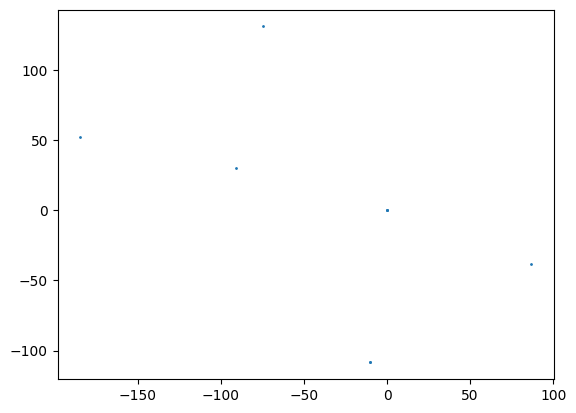

In [9]:
from matplotlib import pyplot as plt 
fig, ax = plt.subplots()
for i, batch in enumerate(train_dataloader):
    ax.scatter((batch[1].x[:,0] * batch[1].x[:,5]).numpy(), (batch[1].x[:,1] * batch[1].x[:,5]).numpy(), s=1)
    print(sum(batch[1].x[:,4]))
    print(sum(batch[1]["n_pulses"].numpy()))
    if i==0:
        break
fig.show()